In [9]:
import glob
def lire_fichier(chemin):
  f = open(chemin, errors="ignore")
  chaine = f.read()
  f.close()
  return chaine

corpus_by_lang = {}
liste_lang = ["de", "en", "fr"]

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

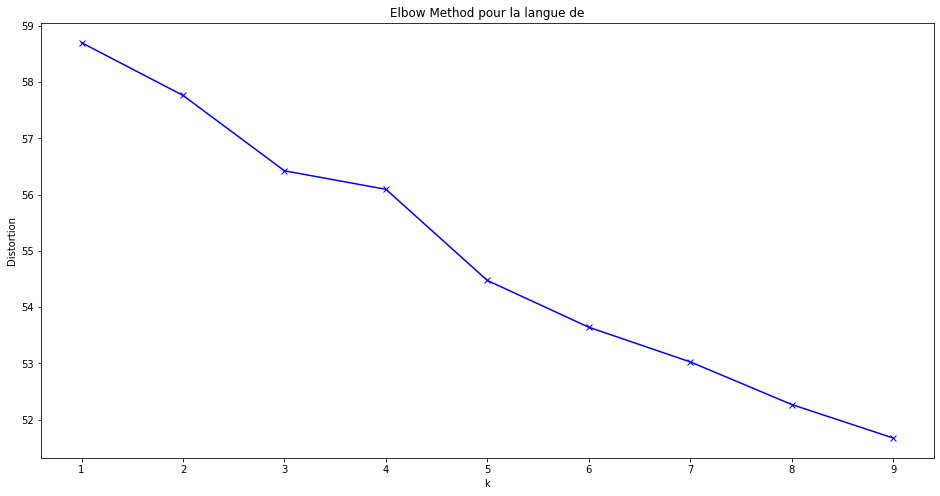

<Figure size 432x288 with 0 Axes>

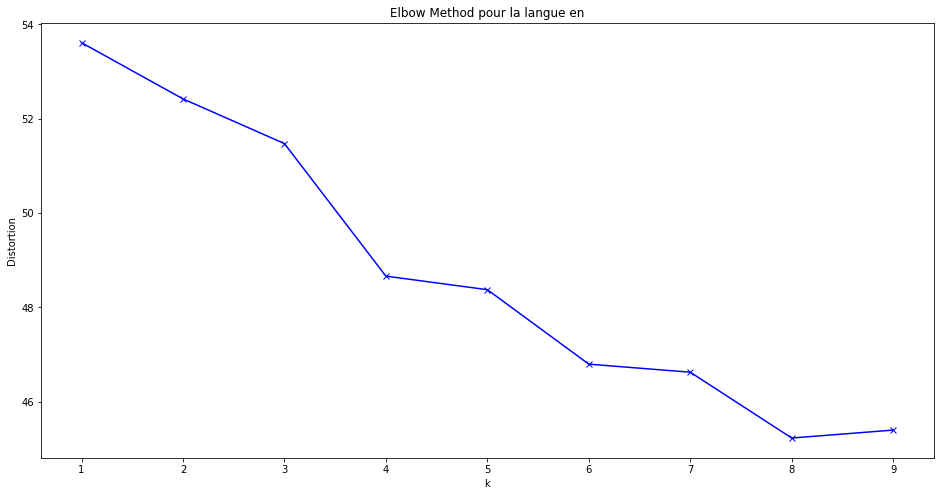

<Figure size 432x288 with 0 Axes>

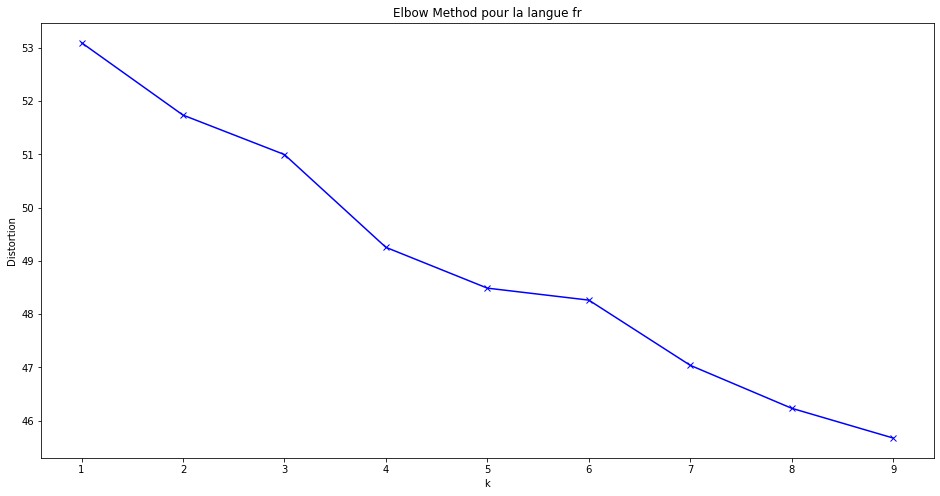

In [13]:
for lang in liste_lang:
  liste_renouvelable = glob.glob(f"data_manuela/Corpus_EnergiesRenouvelables/{lang}/*")
  corpus_renouvelable = [lire_fichier(chemin) for chemin in liste_renouvelable]
    
  vectorizer = TfidfVectorizer()
  vectorizer.fit(corpus_renouvelable)
  features = vectorizer.transform(corpus_renouvelable)

  cls = MiniBatchKMeans(n_clusters=4, random_state=0)
  cls.fit(features)
  cls.predict(features)

  pca = PCA(n_components=2, random_state=0)
  reduced_features = pca.fit_transform(features.toarray())
  reduced_cluster_centers = pca.transform(cls.cluster_centers_)
    
  plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
  plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
  plt.savefig(f"clustering_{lang}.png")
  plt.clf()
  distortions = []
  K = range(1,10)
  for k in K:
    kmeanModel = MiniBatchKMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')  
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title(f"Elbow Method pour la langue {lang}")
  plt.show()